In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [6]:
df=pd.read_csv("iris.csv")

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.species.replace({"setosa":0,"versicolor":1,"virginica":2},inplace=True)


In [11]:
y=df.species
X=df.drop(["species"],axis=1)
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

<AxesSubplot:>

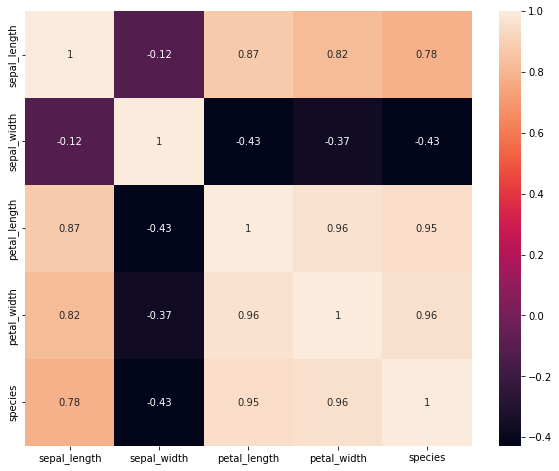

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

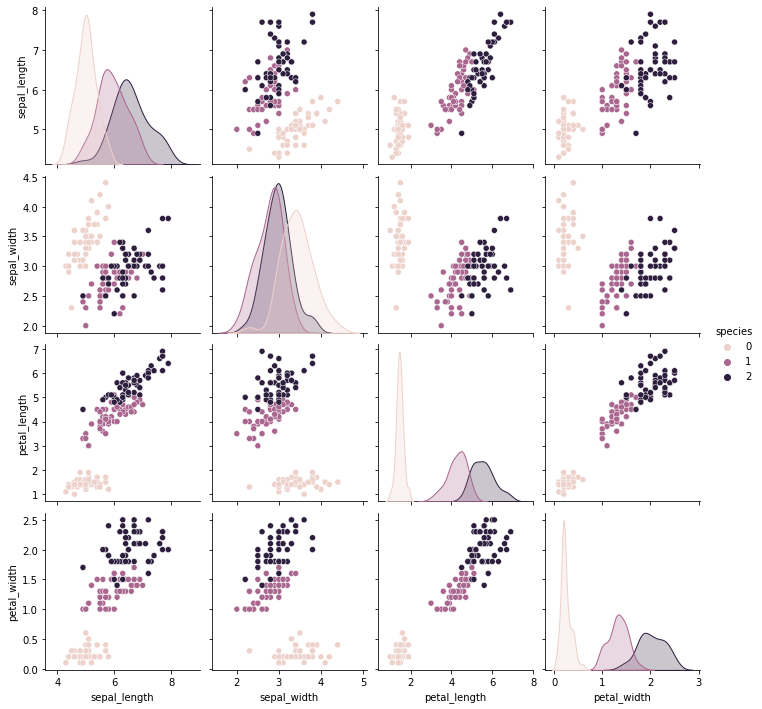

In [13]:
sns.pairplot(df,hue="species")

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
len(X_train),len(y_train),len(X_test)

(120, 120, 30)

In [20]:
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

In [17]:
LSR_model=LogisticRegression()

In [21]:
LSR_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [26]:
y_pred=LSR_model.predict(X_test_scaled)

In [46]:
y_pred_proba=LSR_model.predict_proba(X_test_scaled)[:,1]

In [47]:
y_pred_proba

array([0.87601427, 0.03563059, 0.00288065, 0.75959707, 0.75219184,
       0.06783469, 0.87851773, 0.06426585, 0.5774099 , 0.92580217,
       0.21050021, 0.05035034, 0.03988251, 0.04809499, 0.01008365,
       0.72469638, 0.03180449, 0.93497758, 0.84811867, 0.03244677,
       0.03036493, 0.38015746, 0.03617274, 0.04846703, 0.09008928,
       0.04910548, 0.0848627 , 0.02415723, 0.06430712, 0.04936721])

In [48]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [49]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: species, dtype: int64

In [56]:
(y_pred,y_pred_proba)

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0], dtype=int64),
 array([0.87601427, 0.03563059, 0.00288065, 0.75959707, 0.75219184,
        0.06783469, 0.87851773, 0.06426585, 0.5774099 , 0.92580217,
        0.21050021, 0.05035034, 0.03988251, 0.04809499, 0.01008365,
        0.72469638, 0.03180449, 0.93497758, 0.84811867, 0.03244677,
        0.03036493, 0.38015746, 0.03617274, 0.04846703, 0.09008928,
        0.04910548, 0.0848627 , 0.02415723, 0.06430712, 0.04936721]))

In [36]:
LSR_model.score(X_test_scaled,y_pred)

1.0

In [61]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:
eval_metric(LSR_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1008x864 with 0 Axes>

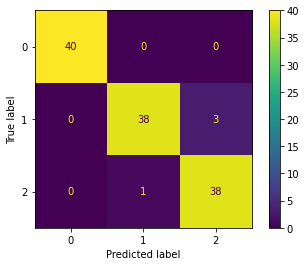

In [66]:
plt.figure(figsize=(14,12))
plot_confusion_matrix(LSR_model,X_train_scaled,y_train)

In [68]:
from sklearn.model_selection import cross_validate

LSR_model = LogisticRegression()

scores = cross_validate(LSR_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.933333
test_precision_weighted    0.941944
test_recall_weighted       0.933333
test_f1_weighted           0.931635
dtype: float64